In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])
# manually add the missing value for the Brenda House 2022-04-01 capacity
shelter_df.loc[(shelter_df["Date"] == "2022-04-01") & (shelter_df["ShelterName"] == "Brendas House"), "Capacity"] = 60
shelter_df=shelter_df[shelter_df['City']=="Calgary"]
shelter_df=shelter_df.astype({"Capacity":"int32","Overnight":"int32"})
shelter_df=shelter_df.loc[shelter_df["Capacity"]>0]


C:\Users\HP\AppData\Local\Temp\ipykernel_10768\365286039.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])


In [3]:
shelter_df_2019=shelter_df[shelter_df['YEAR']==2019]

In [4]:
shelter_df_2021=shelter_df[shelter_df['YEAR']==2021]

In [5]:
shelter_df_2021.head()

,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
120596,2021-01-01,Calgary,Adult Emergency,Hillhurst Centre,Calgary Drop-In Centre,Hillhurst Centre,33,33,,2021,1
120597,2021-01-01,Calgary,Adult Emergency,Wagner Centre,Calgary Salvation Army,Wagner Centre (Women),12,0,,2021,1
120598,2021-01-01,Calgary,Adult Emergency,Centre of Hope,Calgary Salvation Army,Centre of Hope (Men),80,14,,2021,1
120599,2021-01-01,Calgary,Intox,Alpha House,Alpha House,Intox,45,43,,2021,1
120600,2021-01-01,Calgary,Adult Emergency,Mustard Seed,Mustard Seed Calgary,Non-Intox,153,115,,2021,1


In [6]:
shelter_df_2019.drop(shelter_df_2019.columns[[8]],axis=1,inplace=True)
shelter_df_2021.drop(shelter_df_2021.columns[[8]],axis=1,inplace=True)

#shelter_df_2021.drop(shelter_df_2021[shelter_df_2021['ShelterType'] == "DaytimeShelter"].index, inplace = True)
#shelter_df_2021

C:\Users\HP\AppData\Local\Temp\ipykernel_10768\1495925933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_2019.drop(shelter_df_2019.columns[[8]],axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10768\1495925933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelter_df_2021.drop(shelter_df_2021.columns[[8]],axis=1,inplace=True)


In [7]:
shelter_df_2019 = shelter_df_2019.groupby("ShelterName").sum(["Capacity", "Overnight"])
shelter_df_2021 = shelter_df_2021.groupby("ShelterName").sum(["Capacity", "Overnight"])

In [8]:
shelter_df_2019["occupancy_rate"] = shelter_df_2019["Overnight"]/shelter_df_2019["Capacity"]
shelter_df_2021["occupancy_rate"] = shelter_df_2021["Overnight"]/shelter_df_2021["Capacity"]

In [9]:
df_occupancyrate_2019=shelter_df_2019.sort_values(by="occupancy_rate",ascending=False)['occupancy_rate']
#df_occupancyrate_2019 = shelter_df_2019['occupancy_rate']
#df_occupancyrate_2021 = shelter_df_2021['occupancy_rate']
df_occupancyrate_2021=shelter_df_2021.sort_values(by="occupancy_rate",ascending=False)['occupancy_rate']

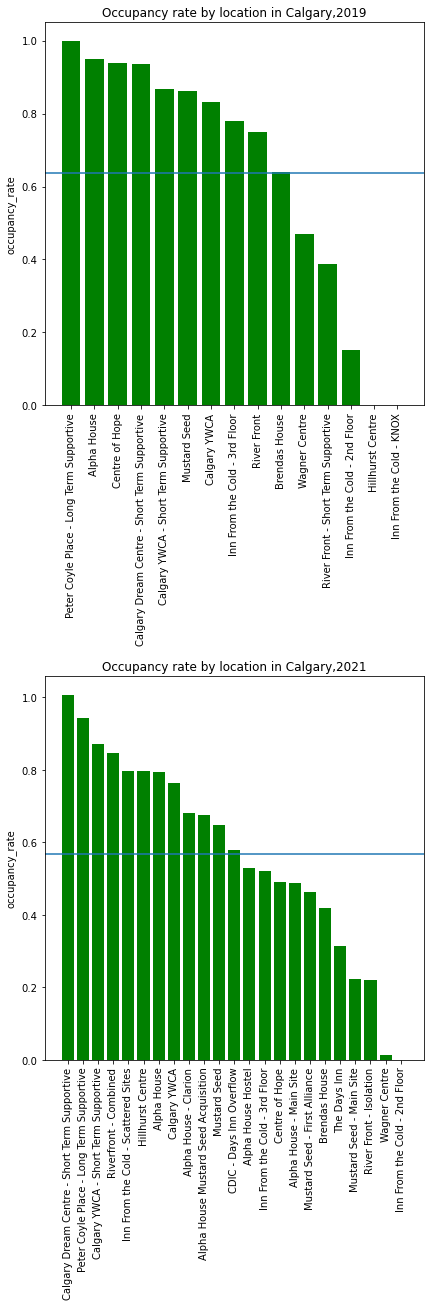

In [10]:
#Barplot
fig, ax=plt.subplots(2,1, figsize=(6,15))
fig.tight_layout(h_pad=25)
ax[0].bar(df_occupancyrate_2019.index,df_occupancyrate_2019,color='g')
ax[0].set_xticks(df_occupancyrate_2019.index, rotation=90)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title("Occupancy rate by location in Calgary,2019")
ax[0].set_ylabel('occupancy_rate')
ax[1].bar(df_occupancyrate_2021.index, df_occupancyrate_2021,color='g')
ax[1].set_xticks(df_occupancyrate_2021.index,rotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title("Occupancy rate by location in Calgary,2021")
ax[1].set_ylabel('occupancy_rate')

mean = shelter_df_2019['occupancy_rate'].mean()
ax[0].axhline(mean)

mean = shelter_df_2021['occupancy_rate'].mean()
ax[1].axhline(mean)

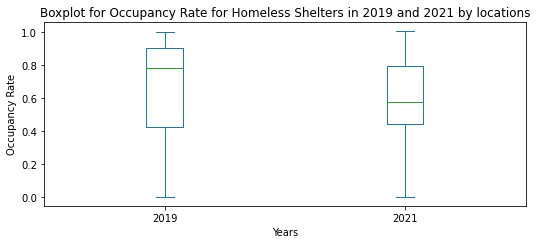

In [21]:
# boxplot
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"2019":df_occupancyrate_2019.reset_index()["occupancy_rate"], "2021": df_occupancyrate_2021.reset_index()["occupancy_rate"]})

# Plot the dataframe
ax = data[['2019', '2021']].plot(kind='box', title='boxplot')

# Display the plot
ax.set_title('Boxplot for Occupancy Rate for Homeless Shelters in 2019 and 2021 by locations')
ax.set_xlabel('Years')
ax.set_ylabel('Occupancy Rate')

plt.show()



In [12]:
# from 2013-2022, find top 10 shelters by capacity

In [13]:
shelter_df_calgary=shelter_df.loc[shelter_df['City']=="Calgary"]
shelter_df_calgary.drop(shelter_df_calgary[shelter_df_calgary['ShelterType'] == "DaytimeShelter"].index,inplace = True)
shelter_df_calgary=shelter_df_calgary.astype({"Capacity":"int32","Overnight":"int32"})
shelter_df_calgary=shelter_df_calgary.groupby(["YEAR","ShelterName"]).sum(["Capacity"])
#df_top5 = shelter_df_calgary.iloc[:, [0]]
#df_top10["occupancy_rate"] = df_top10["Overnight"] /df_top10["Capacity"]
#df_top10_sorted=df_top10.sort_values("Capacity",ascending=False).head(10)
#df_top10_sorted
#df_top10_sorted
#df_top10.reset_index().groupby("YEAR").head(5)
df_top5=shelter_df_calgary.reset_index().sort_values("Capacity",ascending=False).groupby("YEAR").head(5).sort_values("YEAR",ascending=False)
# a.loc[a["YEAR"]==2013].sort_values("Capacity",ascending=False).groupby("YEAR").head(5)
df_top5.loc[:,["YEAR","ShelterName","Capacity","Overnight"]]
df_top5=df_top5.set_index(["YEAR","ShelterName"]).loc[:,[]]

In [14]:
shelter_df_calgary=shelter_df[shelter_df['City']=="Calgary"]
shelter_df_calgary=shelter_df_calgary.set_index(["YEAR","ShelterName"])


In [15]:
joined_df=shelter_df_calgary.join(df_top5,on=["YEAR","ShelterName"],how="inner")


In [16]:
allyears=joined_df.reset_index()
allyears=allyears.loc[:, ['YEAR','MONTH','ShelterName','Capacity','Overnight']]
allyears["occupancy_rate"] =allyears["Overnight"] /allyears["Capacity"]


Text(0.5, 1.0, 'Capacity of Homeless Shelters for top 5 shelters in Calgary')

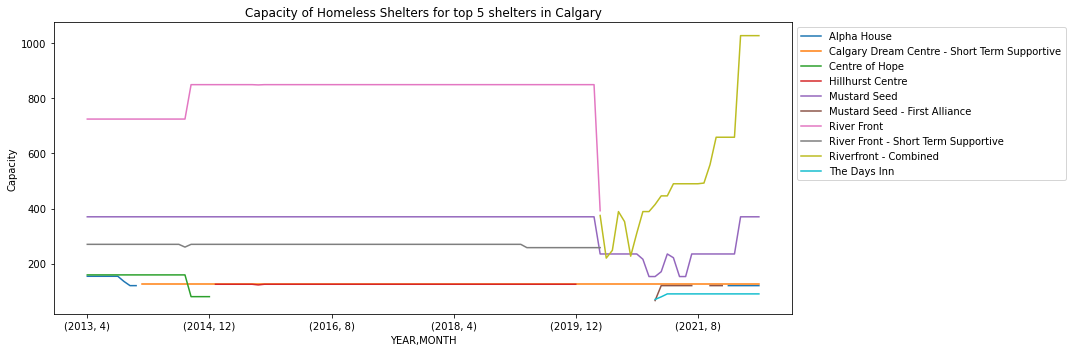

In [17]:
allyears \
    .groupby(['YEAR','MONTH','ShelterName']) \
    .mean("Capacity")["Capacity"] \
    .reset_index() \
    .pivot(index=["YEAR","MONTH"],columns="ShelterName",values="Capacity") \
    .plot(figsize=(15,5)) \
    .legend(bbox_to_anchor=(1,1))
plt.ylabel('Capacity')
plt.title('Capacity of Homeless Shelters for top 5 shelters in Calgary')

Text(0.5, 1.0, 'Admissions to Homeless Shelters for top 5 shelters in Calgary')

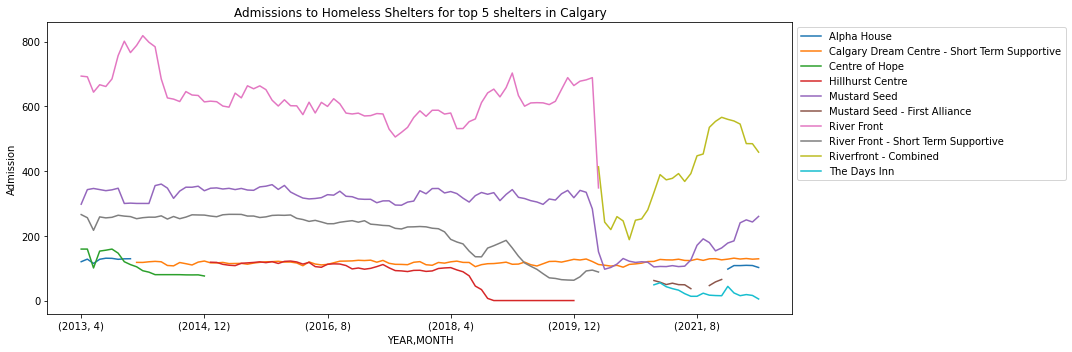

In [18]:
allyears \
    .groupby(['YEAR','MONTH','ShelterName']) \
    .mean("Overnight")["Overnight"] \
    .reset_index() \
    .pivot(index=["YEAR","MONTH"],columns="ShelterName",values="Overnight") \
    .plot(figsize=(15,5)) \
    .legend(bbox_to_anchor=(1,1))
plt.ylabel('Admission')
plt.title('Admissions to Homeless Shelters for top 5 shelters in Calgary')

Text(0.5, 1.0, 'Occupancy Rate of Homeless Shelters for top 5 shelters in Calgary')

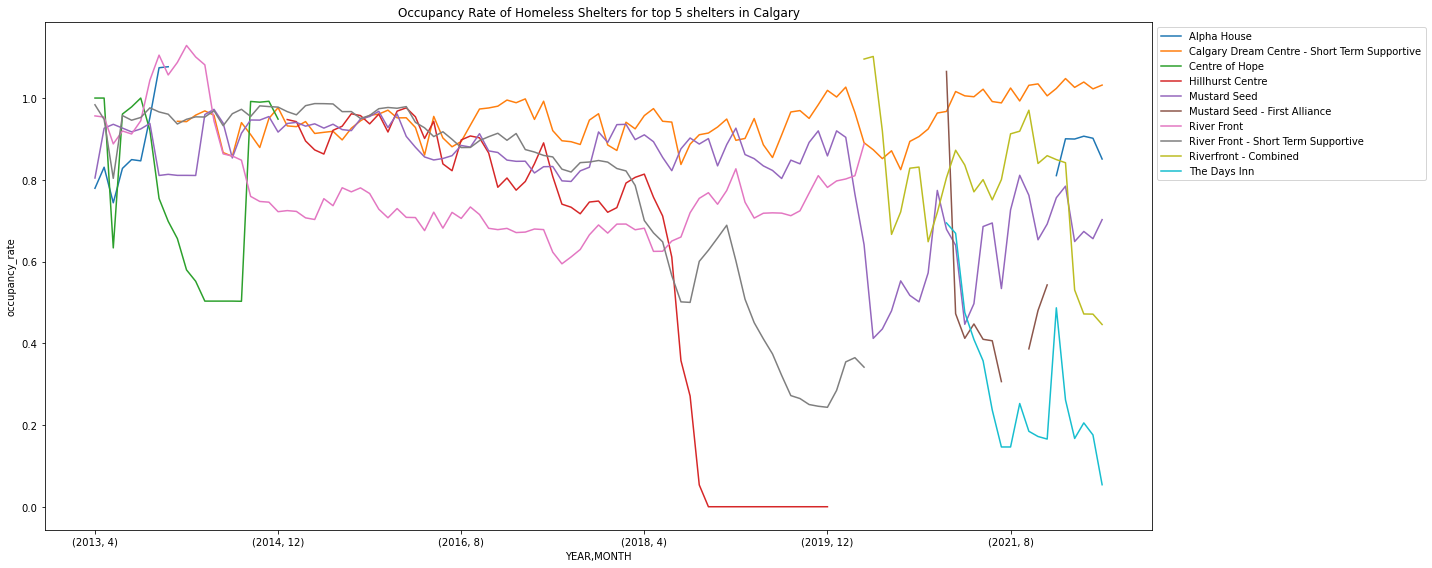

In [19]:
allyears.groupby(['YEAR','MONTH','ShelterName']).mean("occupancy_rate")["occupancy_rate"].reset_index().pivot(index=["YEAR","MONTH"],columns="ShelterName",values="occupancy_rate").plot(figsize=(20,8)).legend(bbox_to_anchor=(1,1))
plt.ylabel('occupancy_rate')
plt.title('Occupancy Rate of Homeless Shelters for top 5 shelters in Calgary')

Things to do:
* additional filtering to eliminate non-homeless shelters (emergency)
* look into the significance of winter shelters

* look into the shift between occupancy rate and temperature (days = 0, 1, 3, 7)

* create plots for 2021

* correlation coeff and regression line 